/tmp/ipykernel_41395/342584898.py:50: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update_plot, frames=None, init_func=init, blit=True)


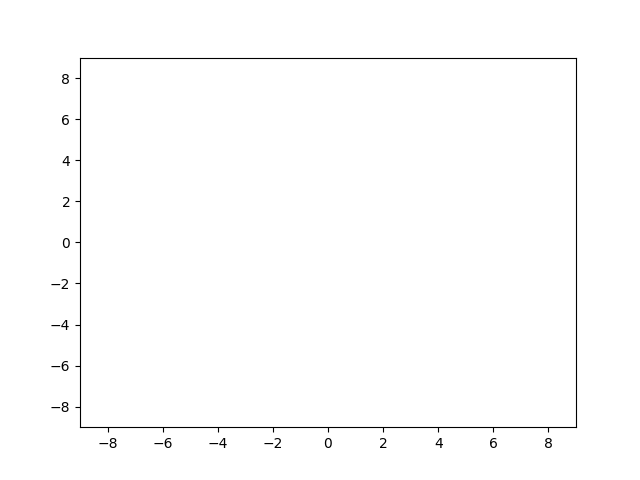

In [1]:
import rospy
import ipywidgets as widgets
from nav_msgs.msg import Odometry
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output

# Enable matplotlib widgets
%matplotlib widget

# Initialize ROS node
rospy.init_node('odom_visualizer_node')

# Initialize plot
fig, ax = plt.subplots()
ax.set_xlim(-9, 9)
ax.set_ylim(-9, 9)
ln, = plt.plot([], [], 'ro')
x_data, y_data = [], []

# Callback function for /odom topic
def odom_callback(odom_msg):
    global x_data, y_data
    # Append robot trajectory coordinates
    x_data.append(odom_msg.pose.pose.position.x)
    y_data.append(odom_msg.pose.pose.position.y)

# Function to initialize the plot
def init():
    ln.set_data([], [])
    return ln,

# Function to update the plot
def update_plot(frame):
    # Clear previous plot
    ax.clear()
    
    # Plot the trajectory
    ax.plot(x_data, y_data, 'ro')
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    
    return ln,

# Subscribe to /odom topic
subscriber2 = rospy.Subscriber('/odom', Odometry, odom_callback) 

# Create the animation
ani = FuncAnimation(fig, update_plot, frames=None, init_func=init, blit=True)

plt.show()
    
